# The goal of this project is to predict visibility based on weather variables using regression algorithms.
The dataset used for this project is sourced from Kaggle, specifically from the "Szeged Weather" dataset by budincsevity. The dataset contains historical weather information for the city of Szeged, Hungary.

The project utilizes machine learning algorithms to build a regression model that can predict Visibility (km). The dataset consists of various features like temperature, humidity, wind speed, wind bearing, visibility, summary, and precipitation. These features will be used to train and test the regression models.

# Installing libraries

In [1]:
!pip install lazypredict
# tool for automating the selection and evaluation of multiple machine learning models.
!pip3 install optuna 
# framework for automatic hyperparameter tuning in machine learning models.
!pip3 install xgboost 
# algorithm based on gradient boosting of decision trees.

# Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import optuna
from sklearn.model_selection import cross_val_score, cross_val_predict

# Loading Dataset

In [3]:
# defining a data frame
df = pd.read_csv("C:/Users/npawl/Downloads/weatherHistory/weatherHistory.csv",index_col=False) 
# Read a comma-separated values (csv) file into DataFrame.

# Exploratory Data Analysis (EDA)





In [4]:
# return the first 5 rows
df.head() # check the column name and the look of the data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51,Partly cloudy throughout the day.


In [5]:
# return the last 5 rows
df.tail() # for verification, to make sure that the data has been correctly loaded and processed

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.02,26.02,0.43,11.00,31.00,16.10,0.00,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58,24.58,0.48,10.09,20.00,15.55,0.00,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.04,22.04,0.56,8.98,30.00,16.10,0.00,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52,21.52,0.60,10.53,20.00,16.10,0.00,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.44,20.44,0.61,5.88,39.00,15.52,0.00,1016.16,Partly cloudy starting in the morning.


Observation: The Daily Summary is the same for the whole day, so we will use the Summary to figure out the weather for a given hour. Daily Summary will remove later.

In [6]:
df.shape # get the number of rows (96453) and the number of columns (12)

(96453, 12)

In [7]:
df.size #  returns the number of elements in the DataFrame.

1157436

In [8]:
df.columns # gives the name of the column

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [9]:
df.info() # prints information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


DataFrame contains 12 columns, 4 categorical, 8 numerical and Precip Type has a different Non-Null value than the number of rows as the entry that it contains missing values

* Let's perform modeling without data transformation in order to check the effectiveness of data mining

In [10]:
# prepare variable
y_basic = df['Visibility (km)'] # the target

# the features excluding the target variable, only numerical, with intuition, we will remove the Apparent Temperature that is too close to the Temperature
X_basic = df.drop(['Visibility (km)','Formatted Date','Summary', 'Precip Type', 'Daily Summary'], axis=1)

# split data into train and test with an 8:2 ratio
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic,y_basic,test_size=0.2,random_state=111)

regr = RandomForestRegressor(random_state=111)
regr.fit(X_train_basic, y_train_basic)
y_pred_basic = regr.predict(X_test_basic)

In [11]:
# check results

# What %y explains our model, the best value 1. The higher the R2 value, the better the fit of the regression to the dataset.
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test_basic, y_pred_basic),2)))
# MAE (Mean Absolute Error) measures the average difference between predicted and actual values. The best value is 0.0
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test_basic, y_pred_basic),2)))


Random Forest Regressor R2 score: 0.54
Random Forest Regressor MAE score: 2.2


Observation: The result is not satisfactory, the model evaluates half of the predictions well

In [12]:
# generate descriptive statistics
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00
mean,11.93,10.86,0.73,10.81,187.51,10.35,0.00,1003.24
std,9.55,10.70,0.20,6.91,107.38,4.19,0.00,116.97
min,-21.82,-27.72,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.69,2.31,0.60,5.83,116.00,8.34,0.00,1011.90
50%,12.00,12.00,0.78,9.97,180.00,10.05,0.00,1016.45
75%,18.84,18.84,0.89,14.14,290.00,14.81,0.00,1021.09
max,39.91,39.34,1.00,63.85,359.00,16.10,0.00,1046.38


* The Apparent Temperature (C) value is too similar to Apparent Temperature (C), Loud Cover has one value, not relevant to the analysis, so it will be removed, Pressure contains the impossible value 0, we will check this later
* Temperature (C)/Apparent Temperature (C): The distribution of temperature seems to approximate a normal distribution, as the mean is close to the median, The percentiles also align in a manner similar to a symmetric distribution.
* Humidity: The distribution of humidity is concentrated around higher values, as the median (50% value) is near 0.78, and the standard deviation is low. This suggests that most humidity measurements are clustered around higher levels.
* Visibility (km): Visibility seems to have a distribution concentrated around higher values, as the median is higher than the mean, and the standard deviation is low. This implies that most days have good visibility.

In [13]:
# drop unnecessary column; Loud Cover all contains 0, one column
df.drop(['Loud Cover'],axis = 1,inplace = True)

<Axes: >

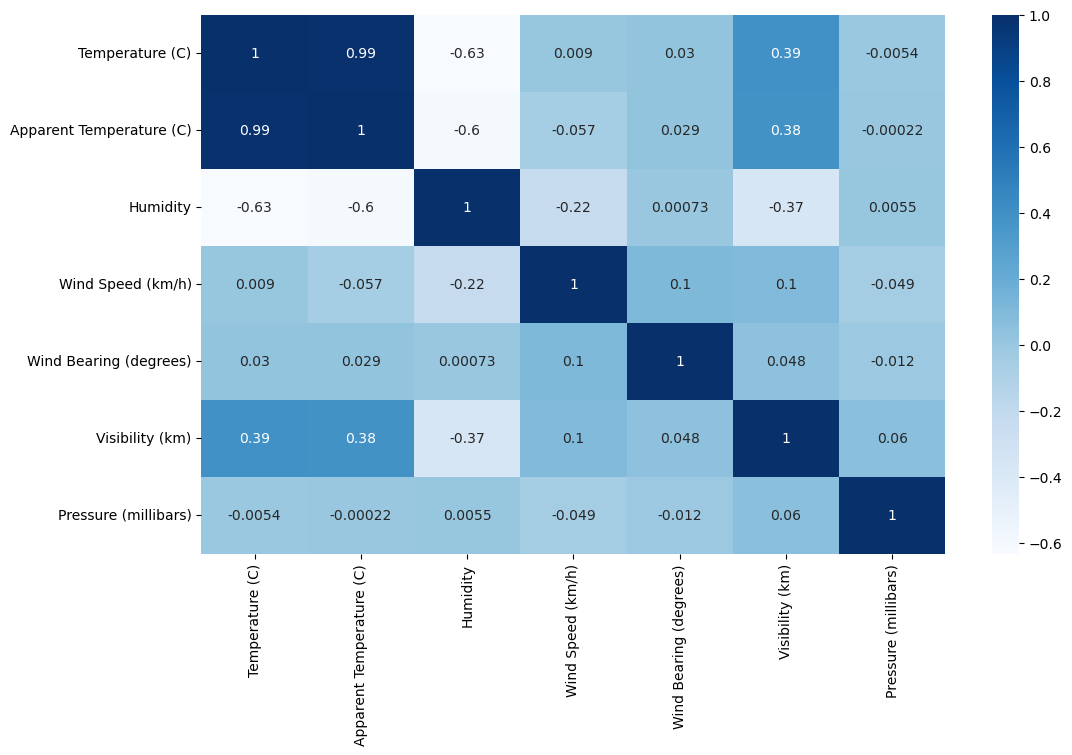

In [14]:
# method finds the correlation of each column in a DataFrame
corr_df=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_df,annot=True,fmt='.2g',cmap='Blues')

* positive correlation - it can be said when the values of two variables change in the same direction. So if one grows, the other behaves the same way.
* negative correlation - in this case, the situation is quite different. A negative correlation means that the values of interdependent variables change in opposite directions. So if one value goes up, the other goes down, and vice versa.
* lack of correlation is a situation in which phenomena, features, and properties have no connection with themselves. 

Obseravtion: A high result between the temperature and the apparent temperature  means that the correlation is too hight, it should be removed.

In [15]:
# drop unnecessary column; Apparent Temperature (C)
df.drop(['Apparent Temperature (C)'],axis = 1,inplace = True)

In [16]:
# checking missing values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

Observation: probably missing a value means that the precip type is not visible,fill it with none

In [17]:
# fill missing values Precip type to lack precip as no precipitation
df.fillna('lack precip', inplace = True)

In [18]:
df['Precip Type'].value_counts() # checking whether to correctly fill in the missing values for none

rain           85224
snow           10712
lack precip      517
Name: Precip Type, dtype: int64

Observation: missing values have been filled in correctly

In [19]:
# duplicate checking
df.duplicated().sum()

24

Observation: there are 24 duplicates that should be removed

In [20]:
# drop duplicates
df.drop_duplicates(keep="first", inplace=True)

# Data Visualization

In [21]:
# drop unnecessary column; Daily Summary, reproducible and not relevant for to the analysis
df.drop(['Daily Summary'],axis = 1,inplace = True)

Categorical columns:

In [22]:
cat = ['Summary','Precip Type']

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 2


Numerical columns:

In [23]:
num = []
for i in df.columns:
    if i not in cat:
        num.append(i)
print('No. of numerical/float columns are:',len(num))

No. of numerical/float columns are: 7


Exploring Categorical Columns/Features

In [24]:
# Checking the number of unique values for each text column
df['Summary'].value_counts()

Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

Observation: there is a large discrepancy in the number, less frequent ones will be marked as Other

In [25]:
# describing less significant variables as other
allowed_vals = ['Partly Cloudy',
                'Mostly Cloudy',
                'Overcast',
                'Clear',
                'Foggy',
                'Breezy and Overcast',
                'Breezy and Mostly Cloudy',
                'Breezy and Partly Cloudy'
                ]

df.loc[~df["Summary"].isin(allowed_vals), "Summary"] = "Other"
# this code is modifying a DataFrame named `df`. It selects rows where the values in the "Summary" column are not in a list of 
# allowed values (`allowed_vals`). For those rows, it sets the value in the "Summary" column to "Other".
df.Summary.value_counts()
# the summary column was created correctly

Partly Cloudy               31726
Mostly Cloudy               28094
Overcast                    16597
Clear                       10873
Foggy                        7148
Other                         561
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Name: Summary, dtype: int64

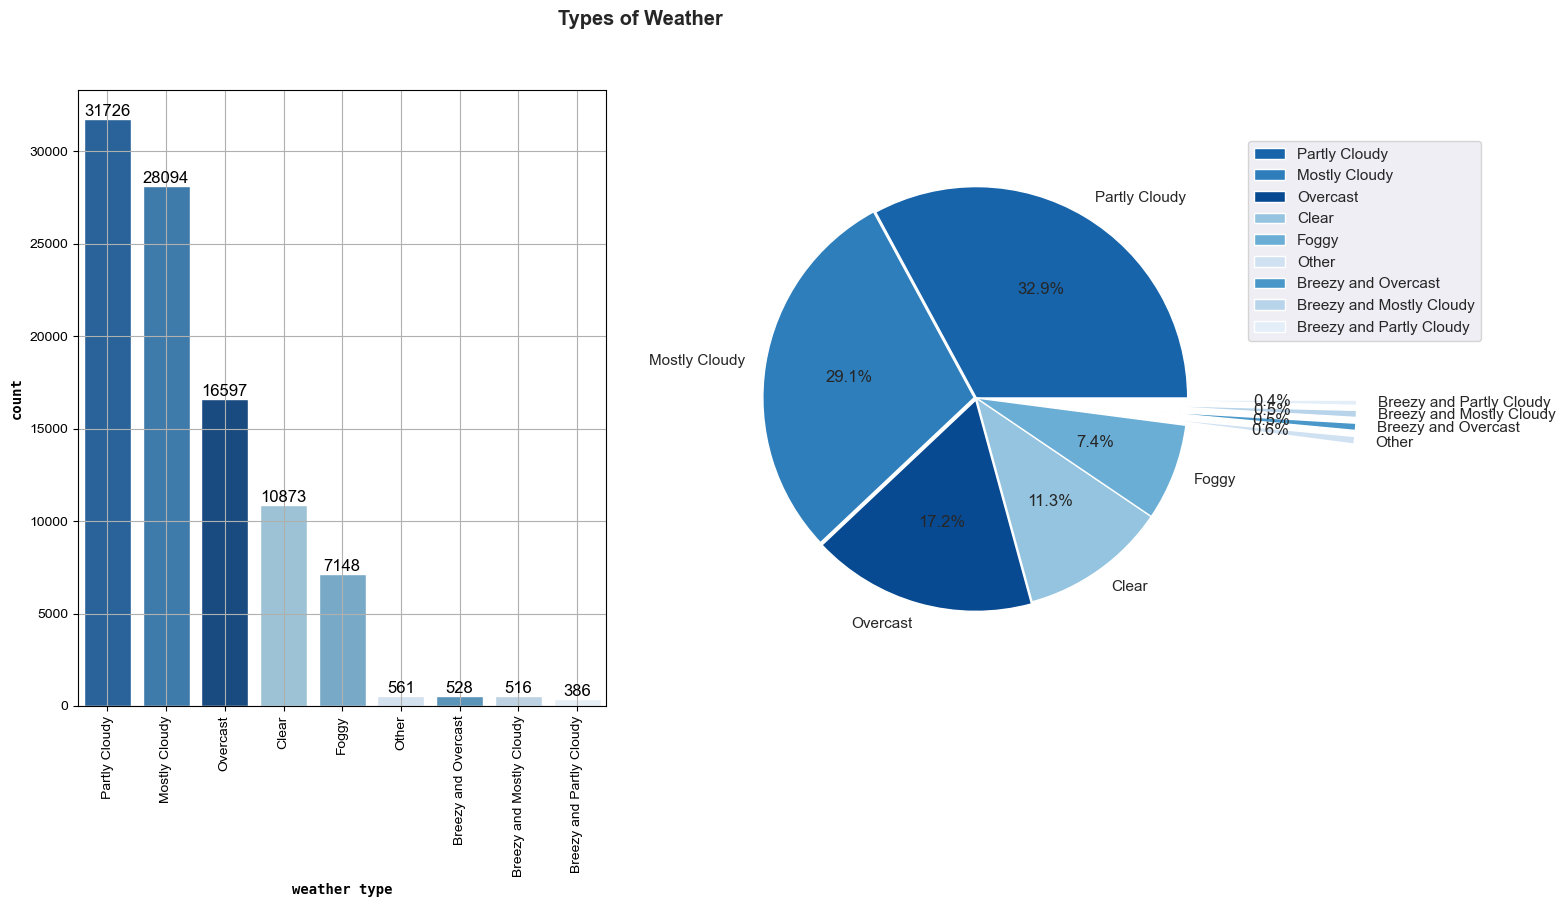

In [26]:
# Let's see how the Summary looks on the chart and how much of it is represented as a percentage.

# creates a figure with two subplots arranged in a 1x2 grid. The figure size is set to (15,8).
fig, ax = plt.subplots(1, 2, figsize=(15,8)) 


x=df['Summary'].value_counts().index
y=df['Summary'].value_counts().values.tolist()

data = df.groupby("Summary").size()


sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

# creates a bar plot using seaborn's `barplot` function. The `x` values are the unique values from the "Summary" column (`x`), 
# the `y` values are the corresponding counts (`y`), and the colors of the bars are determined by the `pal` palette based on the `rank`.
#The plot is displayed on the first subplot (`ax[0]`).
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
#Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

# sets the label for the y,x-axis of the first subplot to 'weather type' with a semi-bold font.
ax[0].set_xlabel('weather type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
# the x-axis tick labels by 90 degrees to avoid overlapping.
ax[0].xaxis.set_tick_params(rotation=90)
# adds grid lines to the first subplot.
ax[0].grid()

# creates a pie chart using seaborn's `pie` function
_, _, autotexts= ax[1].pie(y, labels = x, colors = np.array(pal[::-1])[rank], autopct='%1.1f%%',
explode=[0,.01, 0.01,0,0 ,0.8,0.8,0.8,0.8])

# adds a legend to the plot, placing it outside the plot area.
plt.legend(bbox_to_anchor=(1, 1))
# adds a title to the entire figure, specifying the text as 'Types of Weather' and setting the font weight to bold.
plt.suptitle ('Types of Weather',weight = 'bold')
# adds a title to the entire figure, specifying the text as 'Types of Weather' and setting the font weight to bold.
plt.show()


Observation: The most common types of weather are Partly Cloudy, Mostly Cloudy and Overcast.

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

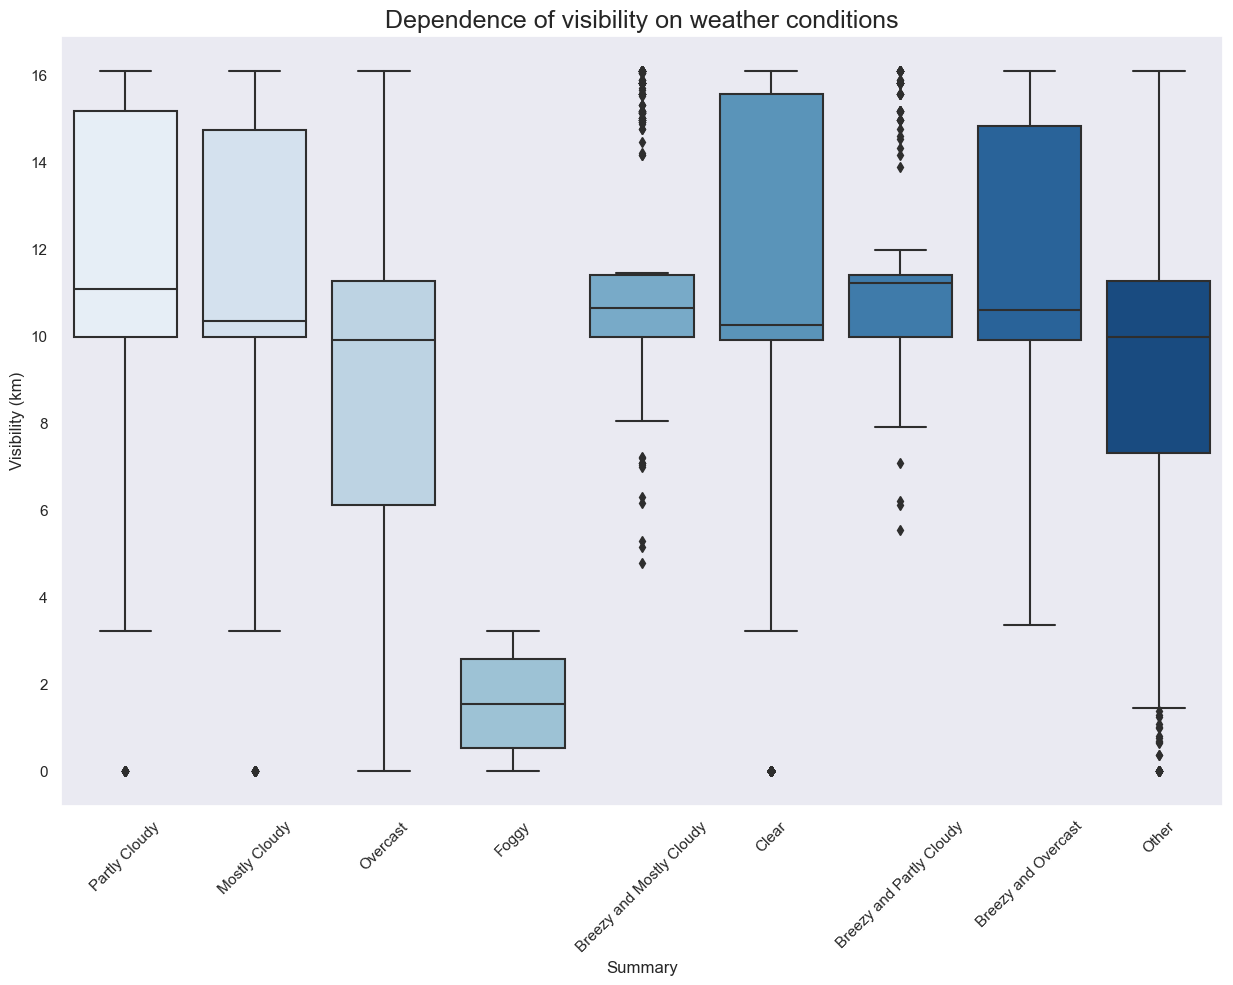

In [27]:
# check the distribution of data 'Summary' in a boxplot

fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

* The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.
* The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range. (just a whole box)
* Seventy-five percent of the scores fall below the upper quartile. (from the bottom end of the box)
* The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.
* An outlier is an observation that is numerically distant from the rest of the data.

Observation: variable clear, mostly cloudly, partly cloudly contains outliers, incorrect values Visibility 0. cloudiness itself does not significantly affect visibility, check it out more closely.

In [28]:
# providing variable clear outliers
# filters the DataFrame `df` to select rows where the value in the "Summary" column is equal to 
#"Clear" and the value in the "Visibility (km)" column is equal to 0.
# The resulting DataFrame, named "Clear_outliers",  will contain only those rows that meet both of these conditions.
Clear_outliers = df.loc[(df.Summary == 'Clear') & (df["Visibility (km)"] == 0)]
Clear_outliers

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
14120,2007-03-19 08:00:00.000 +0100,Clear,rain,10.56,0.63,3.22,110.00,0.00,996.60
14123,2007-03-19 11:00:00.000 +0100,Clear,rain,15.00,0.46,11.27,150.00,0.00,994.70
26352,2009-04-10 00:00:00.000 +0200,Clear,rain,10.56,0.66,3.22,320.00,0.00,1017.20
26664,2009-04-22 00:00:00.000 +0200,Clear,rain,13.33,0.47,14.49,30.00,0.00,1015.00
26665,2009-04-22 01:00:00.000 +0200,Clear,rain,12.22,0.50,11.27,40.00,0.00,1015.70
...,...,...,...,...,...,...,...,...,...
95575,2016-10-31 10:00:00.000 +0100,Clear,lack precip,7.69,0.75,8.58,264.00,0.00,1024.20
95576,2016-10-31 11:00:00.000 +0100,Clear,lack precip,9.59,0.71,11.13,276.00,0.00,1023.70
95577,2016-10-31 12:00:00.000 +0100,Clear,lack precip,11.49,0.69,14.06,284.00,0.00,1023.06
95578,2016-10-31 13:00:00.000 +0100,Clear,lack precip,12.77,0.67,22.54,286.00,0.00,1022.49


Change the visibility with the median below, there are 271 outliers

In [29]:
# check mean values for summary == clear
clear_mean= df.loc[(df.Summary == 'Clear'),'Visibility (km)'].mean()
clear_mean

11.442632631288513

In [30]:
# select the appropriate column and replace the Visibility values 0 -> 10.26 
df.loc[df.Summary == 'Clear',"Visibility (km)"] = df.loc[df.Summary == 'Clear',"Visibility (km)"].replace((0,clear_mean))

In [31]:
# check if it replaced properly, if so it return 0
len(df.loc[(df.Summary == 'Clear') & (df["Visibility (km)"] == 0)])

0

In [32]:
# check the values of invalid visibility in mostly cloudy
mostly_outliers = df.loc[((df.Summary == 'Mostly Cloudy') & (df["Visibility (km)"] == 0))]
len(mostly_outliers) 

36

There are 36 incorrect values, change the visibility with the median below

In [33]:
# check mean for Mostlu Cloudly
mostly_mean = df.loc[(df.Summary == 'Mostly Cloudy'),'Visibility (km)'].mean()
mostly_mean

11.117233957428631

In [34]:
# replace 0 with mostly_median, Visibility 0 -> 10,35
df.loc[df.Summary == 'Mostly Cloudy',"Visibility (km)"] = df.loc[df.Summary == 'Mostly Cloudy',"Visibility (km)"].replace((0,mostly_mean))

In [35]:
# check if it replaced properly, if so it return 0
len(df.loc[((df.Summary == 'Mostly Cloudy') & (df["Visibility (km)"] == 0))])

0

In [36]:
# similarly as above, we make the same changes for Partly Cloudy
partly_outliers = df.loc[((df.Summary == 'Partly Cloudy') & (df["Visibility (km)"] == 0))]
len(partly_outliers) 

27

In [37]:
partly_mean = df.loc[(df.Summary == 'Partly Cloudy'),'Visibility (km)'].mean()
df.loc[df.Summary == 'Partly Cloudy',"Visibility (km)"] = df.loc[df.Summary == 'Partly Cloudy',"Visibility (km)"].replace((0,partly_mean))

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

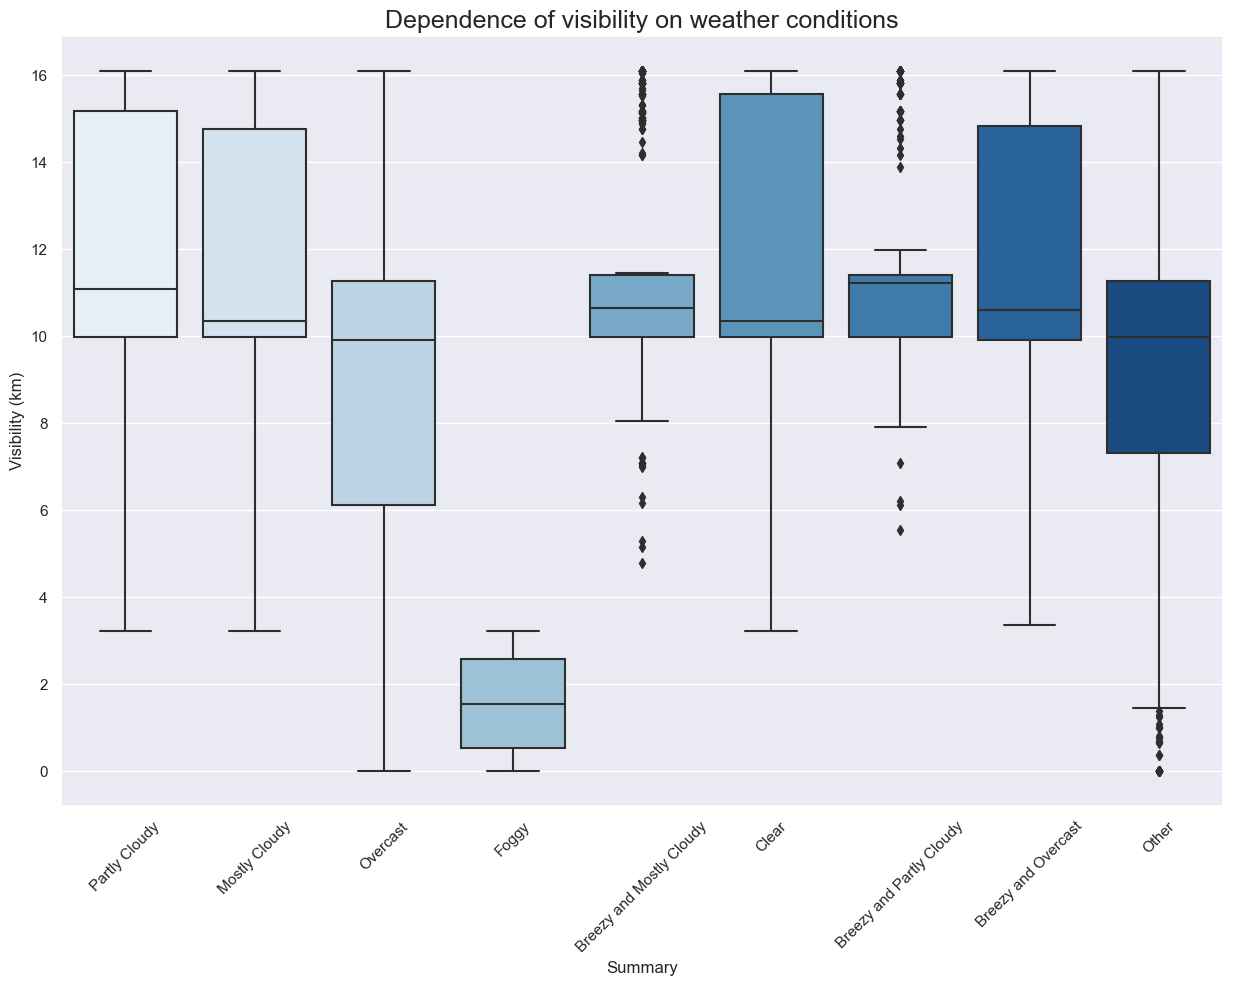

In [38]:
# checking value after cleaning 
fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

The boxplot shows the lack of the above outliers

In [39]:
# Let's see how the Precip Type looks on the chart and how much of it is represented as a percentage.
df['Precip Type'].value_counts()

rain           85200
snow           10712
lack precip      517
Name: Precip Type, dtype: int64

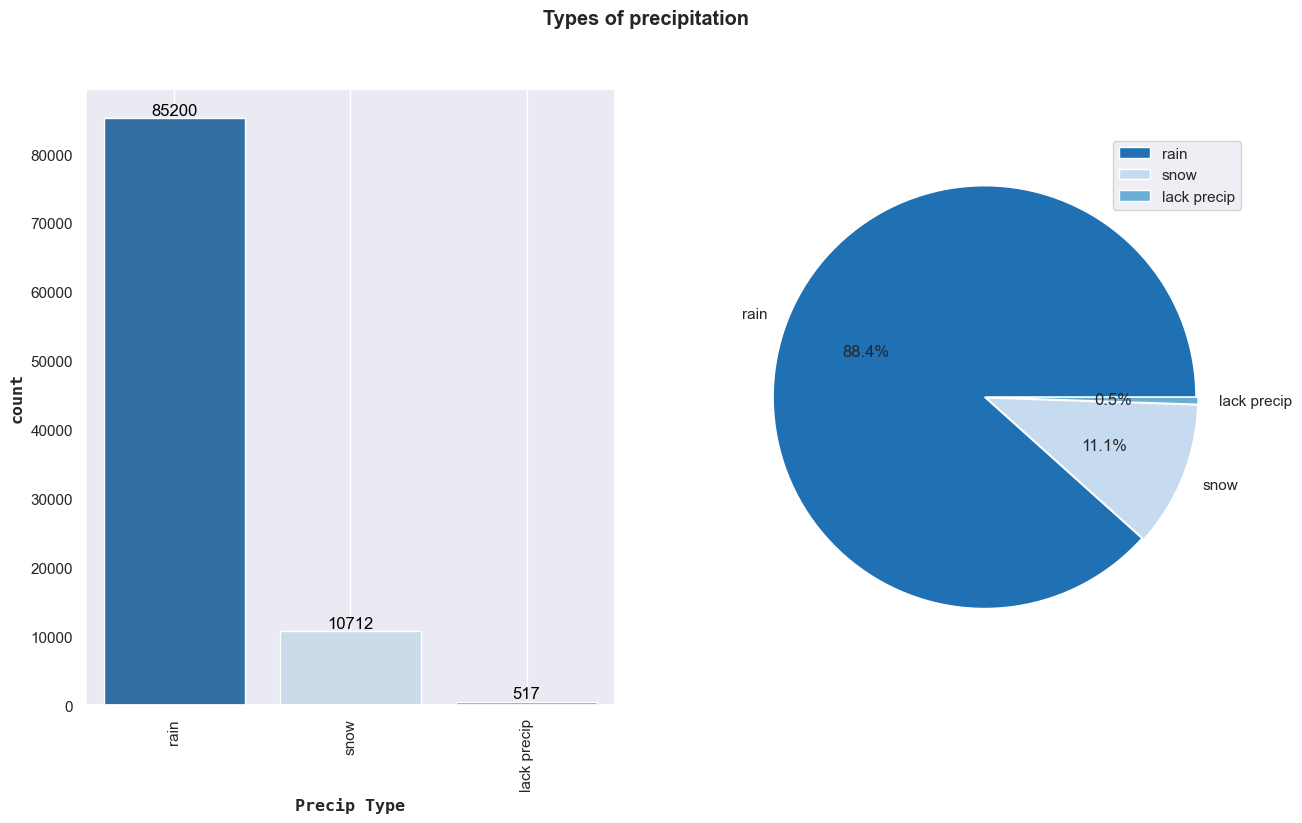

In [40]:
# check the data count and percentage ratio for Precip type on the chart, in the same way as before
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Precip Type'].value_counts().index
y=df['Precip Type'].value_counts().values.tolist()
data = df.groupby("Precip Type").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

# Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
# Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('Precip Type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

# Create a pie chart,
_, _, autotexts= ax[1].pie(y, labels = x, colors = np.array(pal[::-1])[rank], autopct='%1.1f%%',
        explode=[0,.01, 0.01])


plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of precipitation ',weight = 'bold')
plt.show()

Observation: The most common type of precipitation is rain.

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

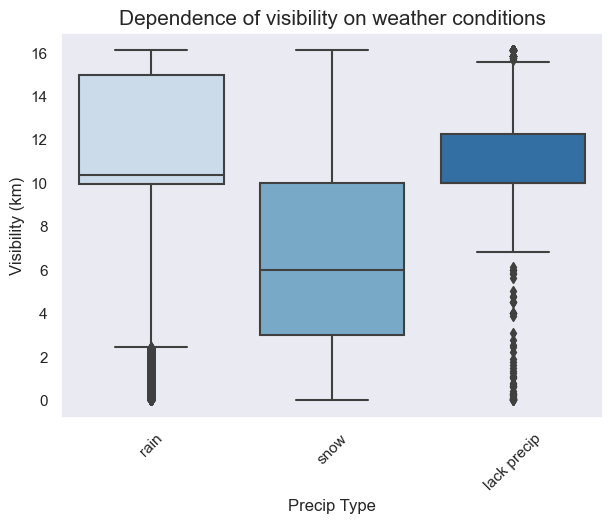

In [41]:
# check the distribution of data - 'Precip Type' in a boxplot 

fig,ax=plt.subplots(figsize=(7,5))

sns.set_style('darkgrid')
sns.boxplot(x='Precip Type',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "15")

Observation: Snow reduces visibility more than rain, outliers for rain and no precipitation are visible, but they may be related to other atomospheric phenomena, e.g. fog

## Exploring Numerical/Float variables

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>],
       [<Axes: title={'center': 'Visibility (km)'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>]], dtype=object)

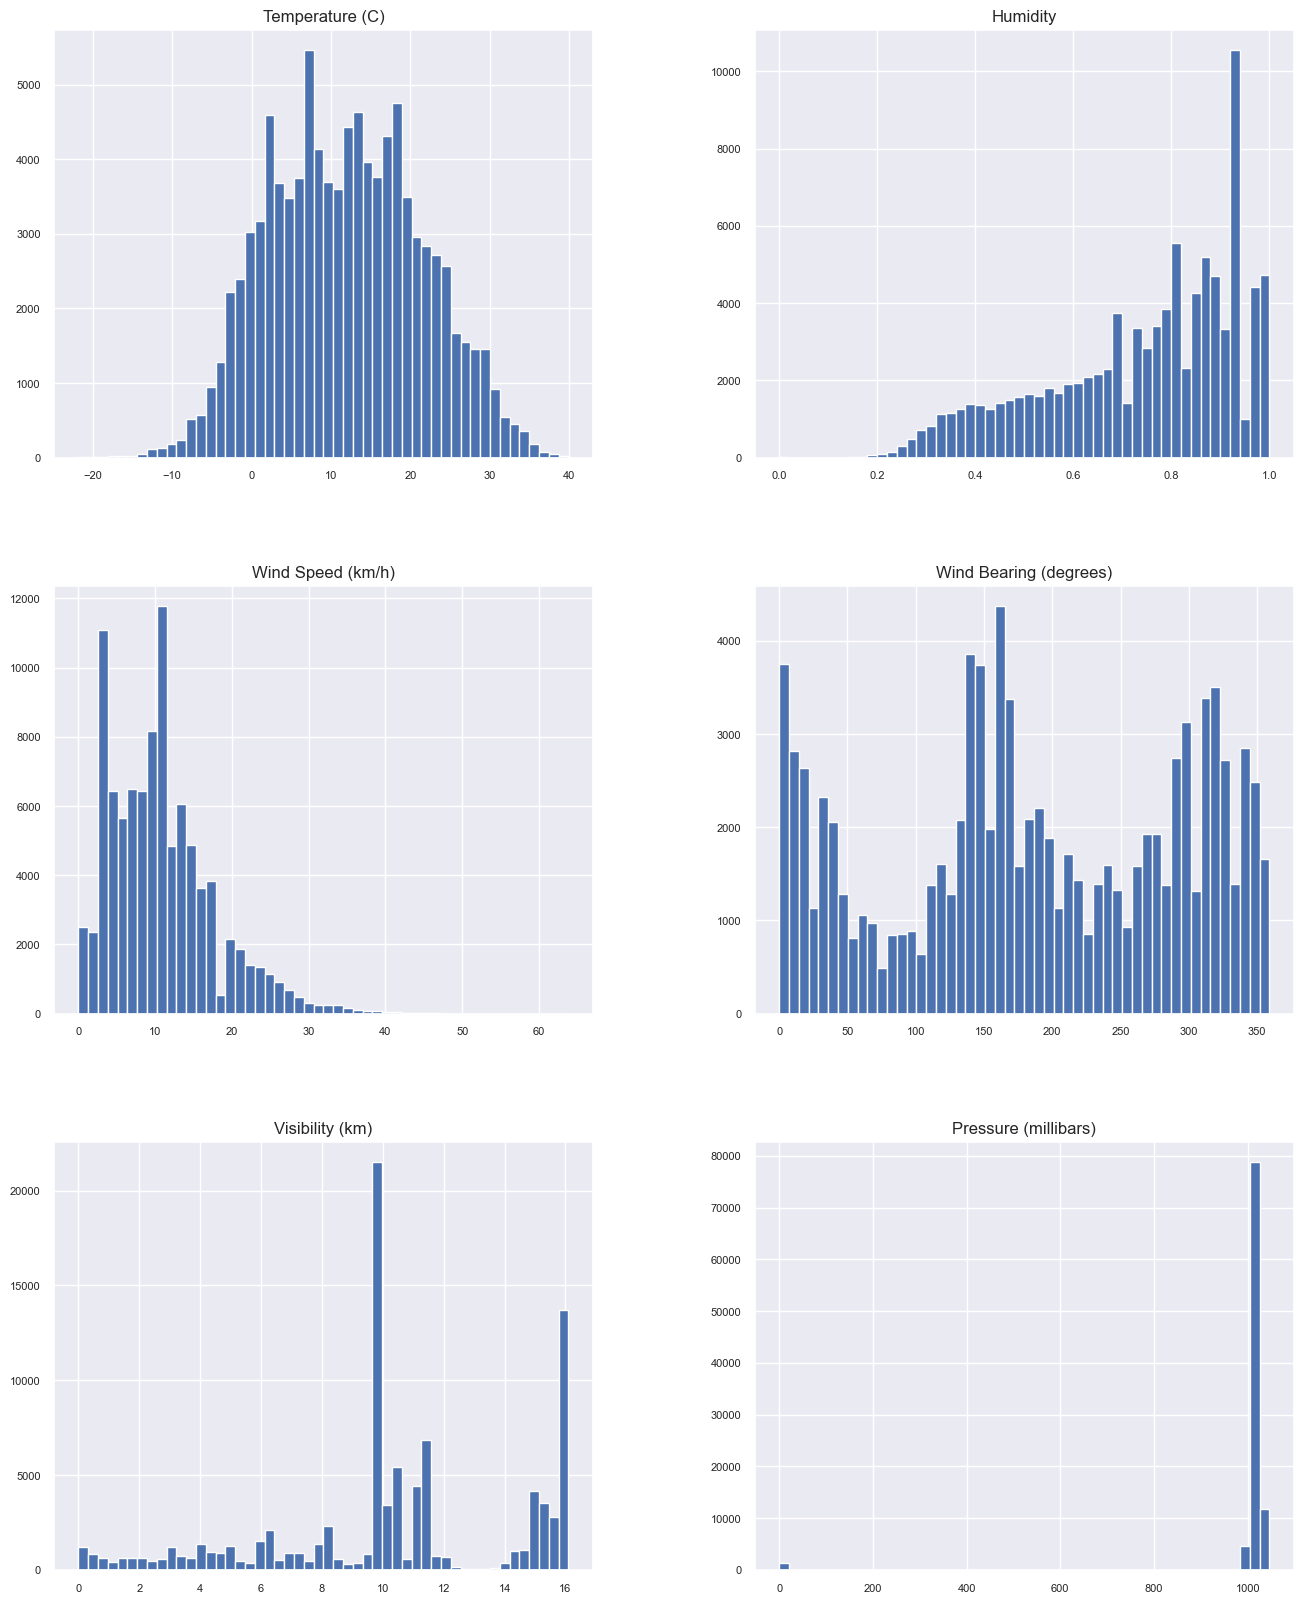

In [42]:
# generates histograms for each numerical column in the DataFrame `df`. The histograms are displayed in a grid layout with a figure size of (16, 20). 
# The `bins` parameter specifies the number of bins to use for each histogram. The `xlabelsize` and `ylabelsize` parameters control the size of the x-axis and y-axis labels, respectively.

df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Out of pressure observations look reasonable, let's check the pressure more closely

<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

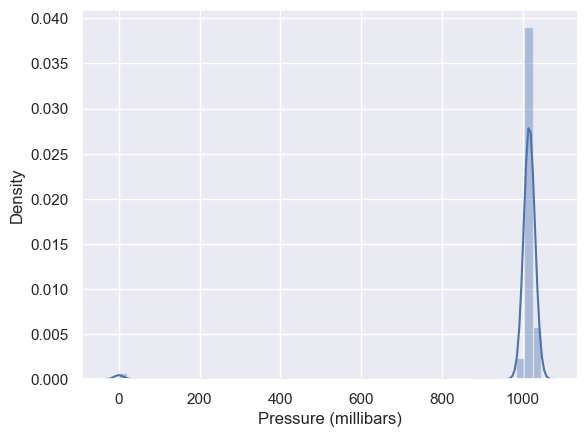

In [43]:
sns.distplot(df['Pressure (millibars)']) # the histogram and density function into one graph

Pressure contains incorrect 0 values, they will be supplemented with an average pressure value

In [44]:
# calculation of the average value for the pressure
pressure_median = df['Pressure (millibars)'].median()

In [45]:
# replacing 0 with the median value calculated above
df['Pressure (millibars)'].replace((0,pressure_median), inplace = True)

<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

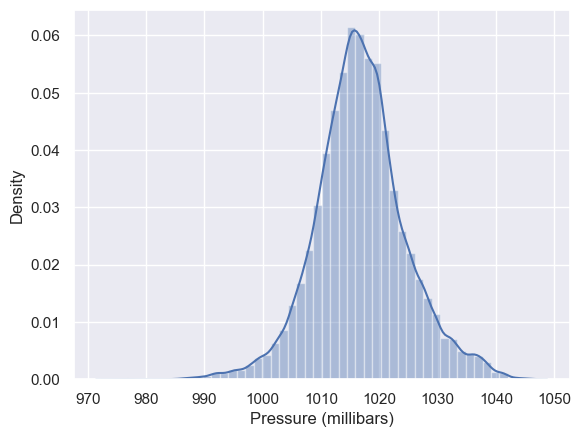

In [46]:
# checking the distribution on the chart after supplementing outliers
sns.distplot(df['Pressure (millibars)'])

# Feature Scaling
* preprocessing technique used in machine learning to standardize or normalize the range of features (variables) in a dataset. It involves transforming the values of different features so that they are on a similar scale. This is important because many machine learning algorithms perform better or converge faster when the features are on a similar scale.

In [47]:
# checking column names after data cleaning
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [48]:
# prepare variable
# assigns the values from the "Visibility (km)" column of the DataFrame to the variable `y`. 
# This column represents the target variable, which is the variable we want to predict or model.
y = df['Visibility (km)'] 

# the features excluding the target variable, columns represent the features or independent variables that will be used to predict the target variable. 
X = df[['Summary', 'Precip Type', 'Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)','Pressure (millibars)']] 

By separating the target variable `y` and the features `X`, we are preparing the data for a machine learning algorithm. The features `X` will be used to train the model, while the target variable `y` will be used to evaluate the performance of the model's predictions

In [49]:
# split data into train and test with an 8:2 ratio,  the `train_test_split` function from the scikit-learn library is being used to split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [50]:
# checking X_train data len
len(X_train)

77143

In [51]:
# checking X_test data len
len(X_test)

19286

* By splitting the data into training and testing sets, we can evaluate the performance of the machine learning model on unseen data and assess its generalization capabilities.

## * train part preparation 

In [52]:
# reset the indexes to be sequential
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

the data has been split correctly

### Encode categorical features as a one-hot numeric array

In [53]:
# encode categorical features as a one-hot numeric array
ohe = OneHotEncoder()

* `OneHotEncoder` class is used to perform one-hot encoding on categorical features. One-hot encoding is a process of converting categorical variables into a binary vector representation, which can be understood and used by machine learning algorithms.

In [54]:
# This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter)
# fit_transform - Fit to data, then transform it.

feature_array = ohe.fit_transform(X_train[['Summary', 'Precip Type']]).toarray()

In [55]:
# checking the category by fit model
ohe.categories_

[array(['Breezy and Mostly Cloudy', 'Breezy and Overcast',
        'Breezy and Partly Cloudy', 'Clear', 'Foggy', 'Mostly Cloudy',
        'Other', 'Overcast', 'Partly Cloudy'], dtype=object),
 array(['lack precip', 'rain', 'snow'], dtype=object)]

two data array have been obtained, which should be merged into one

In [56]:
feature_labels = ohe.categories_

In [57]:
# Stack arrays in sequence horizontally (column wise).
feature_labels = np.hstack(feature_labels)
print(feature_labels)

['Breezy and Mostly Cloudy' 'Breezy and Overcast'
 'Breezy and Partly Cloudy' 'Clear' 'Foggy' 'Mostly Cloudy' 'Other'
 'Overcast' 'Partly Cloudy' 'lack precip' 'rain' 'snow']


* one array was created from the previous two
*  `feature_labels = np.hstack(feature_labels)` is used to concatenate or combine the individual elements in the `feature_labels` array into a single array along the second axis. 

In [58]:
# Constructing DataFrame
features = pd.DataFrame(feature_array, columns = feature_labels)
features.head()

,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,lack precip,rain,snow
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [59]:
# removing columns
X_train.drop(X_train[['Summary','Precip Type']],axis = 1,inplace = True)

In [60]:
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,17.98,0.88,16.20,220.00,1003.70
1,22.80,0.70,9.66,328.00,1011.94
2,19.84,0.69,13.96,19.00,1014.57
3,-8.75,0.92,14.02,80.00,1003.49
4,9.06,0.71,3.38,187.00,1023.32
...,...,...,...,...,...
77138,4.84,0.77,10.85,139.00,1022.10
77139,8.94,0.72,12.83,30.00,1029.10
77140,28.13,0.65,7.76,160.00,1015.53
77141,23.97,0.50,14.91,343.00,1009.49


In [61]:
# standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# fits the scaler to the training data
scaler.fit(X_train) 
# takes X_train_enc as input and scales it using the mean and standard deviation calculated during the fit() step.
X_train_sc=scaler.transform(X_train)

In [62]:
# Utworzenie DataFrame ze złączenia przeskalowanych danych numerycznych i danych binarnych
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [63]:
X_train_sc

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.63,0.74,0.78,0.30,-1.68
1,1.14,-0.18,-0.16,1.31,-0.63
2,0.83,-0.23,0.46,-1.57,-0.29
3,-2.17,0.94,0.47,-1.00,-1.71
4,-0.30,-0.13,-1.07,-0.01,0.84
...,...,...,...,...,...
77138,-0.74,0.18,0.01,-0.45,0.68
77139,-0.31,-0.08,0.29,-1.47,1.58
77140,1.70,-0.44,-0.44,-0.26,-0.16
77141,1.26,-1.20,0.59,1.45,-0.94


In [64]:
# concatenate of the transformed data Summary and Precip Type, to the numeric category
X_train_scaled = pd.concat([X_train_sc, features], axis=1)
X_train_scaled

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,lack precip,rain,snow
0,0.63,0.74,0.78,0.30,-1.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,1.14,-0.18,-0.16,1.31,-0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.83,-0.23,0.46,-1.57,-0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,-2.17,0.94,0.47,-1.00,-1.71,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,-0.30,-0.13,-1.07,-0.01,0.84,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77138,-0.74,0.18,0.01,-0.45,0.68,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
77139,-0.31,-0.08,0.29,-1.47,1.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
77140,1.70,-0.44,-0.44,-0.26,-0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
77141,1.26,-1.20,0.59,1.45,-0.94,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


## * test part preparation 
- prepared as a train part

In [65]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [66]:
# encode categorical features as a one-hot numeric array
feature_array_test = ohe.transform(X_test[['Summary', 'Precip Type']]).toarray()

features_test = pd.DataFrame(feature_array_test, columns = feature_labels)


In [67]:
features_test

,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,lack precip,rain,snow
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
19281,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
19282,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
19283,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
19284,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [68]:
X_test.drop(X_test[['Summary','Precip Type']],axis = 1,inplace = True)

In [69]:
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,16.02,0.31,21.96,282.00,1019.87
1,17.29,0.87,0.00,0.00,1020.79
2,7.17,0.92,20.64,331.00,1004.18
3,21.11,0.45,14.55,253.00,1008.07
4,19.87,0.78,2.88,144.00,1015.19
...,...,...,...,...,...
19281,14.09,0.90,6.86,310.00,1019.81
19282,1.17,0.93,0.69,280.00,1035.52
19283,22.69,0.29,12.64,308.00,1017.72
19284,5.00,0.81,15.49,170.00,1019.39


In [70]:
# scale test data
X_test_sc=scaler.transform(X_test)

In [71]:
# Utworzenie DataFrame ze złączenia przeskalowanych danych numerycznych i danych binarnych
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [72]:
X_test_sc

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.43,-2.18,1.61,0.88,0.39
1,0.56,0.69,-1.56,-1.75,0.51
2,-0.50,0.94,1.42,1.34,-1.62
3,0.96,-1.46,0.54,0.61,-1.12
4,0.83,0.23,-1.14,-0.41,-0.21
...,...,...,...,...,...
19281,0.23,0.84,-0.57,1.14,0.39
19282,-1.13,0.99,-1.46,0.86,2.40
19283,1.13,-2.28,0.27,1.12,0.12
19284,-0.73,0.38,0.68,-0.16,0.33


In [73]:
X_test_sc.shape

(19286, 5)

In [74]:
X_test_scaled = pd.concat([X_test_sc, features_test], axis=1)
X_test_scaled

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Foggy,Mostly Cloudy,Other,Overcast,Partly Cloudy,lack precip,rain,snow
0,0.43,-2.18,1.61,0.88,0.39,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.56,0.69,-1.56,-1.75,0.51,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,-0.50,0.94,1.42,1.34,-1.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,0.96,-1.46,0.54,0.61,-1.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,0.83,0.23,-1.14,-0.41,-0.21,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19281,0.23,0.84,-0.57,1.14,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
19282,-1.13,0.99,-1.46,0.86,2.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
19283,1.13,-2.28,0.27,1.12,0.12,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
19284,-0.73,0.38,0.68,-0.16,0.33,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


## Linear Regression  
that computes the linear relationship between a dependent variable and one or more independent features. 
The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables. 

In [75]:
# model teaching
reg_model = LinearRegression()
reg_model.fit(X_train_scaled,y_train)
# prediction
y_pred = reg_model.predict(X_test_scaled) #for test data
y_pred_train = reg_model.predict(X_train_scaled) # for train data

In [76]:
print('Results for train data')
print('Linear Regression R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Linear Regression MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Linear Regression R2 score: 0.45
Linear Regression MAE score: 2.57


In [77]:
print('Results for test data')
print('Linear Regression R2 score: '+ str(round(r2_score(y_test, y_pred),2)))
print('Linear Regression MAE score: '+ str(round(mae(y_test, y_pred),2)))


Results for test data
Linear Regression R2 score: 0.45
Linear Regression MAE score: 2.57


* A low R2 score and high MAE score for linear regression on the training data could indicate that the linear regression model is not able to capture the underlying relationship between the features and the target variable very well. 
* Non-linearity: Linear regression assumes a linear relationship between the features and the target variable. If the relationship is non-linear, linear regression may not be able to accurately capture it. In such cases, using more complex models like polynomial regression or non-linear regression may yield better results.
* the model is too simple to capture the underlying patterns in the data. 

## Polynomial regression
* type of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled as an nth degree polynomial. It is an extension of linear regression.

In [78]:
# specifies that we want to create polynomial features up to the second degree.
poly = PolynomialFeatures(degree=2)
# This line transforms the scaled training data, into polynomial features. 
# Takes the scaled training data as input and creates a new feature matrix with the original features 
# and their polynomial combinations up to the specified degree.
X_poly_train = poly.fit_transform(X_train_scaled)
# transforms the scaled test data, into polynomial features in a similar manner as the previous step.
X_poly_test = poly.fit_transform(X_test_scaled)
# creates an instance of the `LinearRegression` class, which will be used to fit the polynomial regression model.
poly_reg_model = LinearRegression()
# model teaching
poly_reg_model.fit(X_poly_train,y_train)
# prediction
y_pred_train = poly_reg_model.predict(X_poly_train)
y_pred_pol = poly_reg_model.predict(X_poly_test)

In [79]:
print('Results for train data')
print('Polynomial regression R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Polynomial regression MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Polynomial regression R2 score: 0.52
Polynomial regression MAE score: 2.39


In [80]:
print('Results for test data')
print('Polynomial regression R2 score: '+ str(round(r2_score(y_test, y_pred_pol),2)))
print('Polynomial regression MAE score: '+ str(round(mae(y_test, y_pred_pol),2)))


Results for test data
Polynomial regression R2 score: 0.53
Polynomial regression MAE score: 2.39


As with linear regression, the data is too different for the model to produce a satisfactory result

## Decision Tree Regressor
 
 * In a Decision Tree Regressor, the main goal is to create a tree-like structure of decision nodes and leaves, where each decision node represents a question about a feature and each leaf node represents a predicted numeric value.

In [81]:
model = DecisionTreeRegressor()
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(5, 10),
                                'min_samples_split': range(400,1100, 100),
                                'min_samples_leaf': range(50, 151, 20) 
                                },
                  cv=10,
                  scoring='neg_mean_absolute_error')
gs.fit(X_train_scaled,y_train)
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_leaf': 90, 'min_samples_split': 400}
2.214649520805151


the code searches various combinations of DecisionTreeRegressor model parameters using Grid Search CV to find the best parameters that minimize the mean absolute error on the training set. It also lists the best parameters found and the model evaluation result obtained.

In [84]:
# train model with the best params
tree_model = tree.DecisionTreeRegressor(**gs.best_params_)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_train = tree_model.predict(X_train_scaled)

In [85]:
print('Results for train data')
print('Decision Tree Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Decision Tree Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Decision Tree Regressor R2 score: 0.57
Decision Tree Regressor MAE score: 2.19


In [86]:
print('Results for test data')
print('Decision Tree Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_tree),2)))
print('Decision Tree Regressor MAE score: '+ str(round(mae(y_test, y_pred_tree),2)))

Results for test data
Decision Tree Regressor R2 score: 0.57
Decision Tree Regressor MAE score: 2.2


### Calculate and present feature importance for a decision tree model  based on scaled training data.

In [87]:
feat_importance = tree_model.tree_.compute_feature_importances(normalize=False)
feat_importance = pd.concat([X_train_scaled.columns.to_series().reset_index(drop=True), pd.Series(feat_importance)], axis=1)
feat_importance = feat_importance.sort_values(feat_importance.columns[1], ascending = False)
feat_importance

,0,1
9,Foggy,6.27
1,Humidity,1.87
0,Temperature (C),0.82
2,Wind Speed (km/h),0.49
12,Overcast,0.22
4,Pressure (millibars),0.07
3,Wind Bearing (degrees),0.06
8,Clear,0.02
13,Partly Cloudy,0.02
10,Mostly Cloudy,0.01


Features with higher importance values are those that the model considers more informative for predicting the output values. We will remove the less important.

In [88]:
threshold = 0.03
selected_features = feat_importance[feat_importance[feat_importance.columns[1]] > threshold][feat_importance.columns[0]].tolist()

print(selected_features)

['Foggy', 'Humidity', 'Temperature (C)', 'Wind Speed (km/h)', 'Overcast', 'Pressure (millibars)', 'Wind Bearing (degrees)']


In [89]:
X_test_scaled= X_test_scaled[selected_features]

In [90]:
X_train_scaled= X_train_scaled[selected_features]

In [91]:
X_train_scaled.shape

(77143, 7)

In [92]:
X_test_scaled.shape

(19286, 7)

## Random Forest Regressor
* extension of the decision tree algorithm primarily used for regression tasks, which involve predicting continuous numeric values. It builds multiple decision trees and aggregates their predictions to achieve more accurate and stable results.

In [93]:
regr = RandomForestRegressor(random_state=111)
regr.fit(X_train_scaled, y_train)
y_pred_rand = regr.predict(X_test_scaled)
y_pred_train = regr.predict(X_train_scaled)

In [94]:
print('Results for train data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Random Forest Regressor R2 score: 0.95
Random Forest Regressor MAE score: 0.74


In [95]:
print('Results for test data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_tree),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test, y_pred_tree),2)))

Results for test data
Random Forest Regressor R2 score: 0.57
Random Forest Regressor MAE score: 2.2


### RandomizedSearchCV 
* technique used for hyperparameter tuning models, used to search for the best combination of hyperparameters for a given model. Performs a randomized search over a predefined set of hyperparameter values 
* For each combination of hyperparameters, it performs cross-validation (usually using k-fold cross-validation) to estimate the model's performance.
* first need to create a parameter grid to sample from during fitting

In [96]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [50, 100, 125]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50, 75, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1000, 1250, 1500, 1750, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200, None], 'min_samples_split': [50, 100, 125], 'min_samples_leaf': [50, 75, 100], 'bootstrap': [True, False]}


In [97]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)
rf_random.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 1500,
 'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 133,
 'bootstrap': False}

In [98]:
# training the model with the best hyperparameters
best_random = RandomForestRegressor(**rf_random.best_params_)
best_random.fit(X_train_scaled, y_train)
y_pred_rand = regr.predict(X_test_scaled)
y_pred_train = regr.predict(X_train_scaled)

In [99]:
print('Results for train data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
Random Forest Regressor R2 score: 0.95
Random Forest Regressor MAE score: 0.74


In [100]:
print('Results for test data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_rand),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test, y_pred_rand),2)))

Results for test data
Random Forest Regressor R2 score: 0.63
Random Forest Regressor MAE score: 1.98


## Lazy Regressor
*  library that provides a quick and convenient way to evaluate the performance of multiple regression models on a given dataset. It's particularly useful to get a rough idea of how different regression algorithms perform without spending a lot of time fine-tuning each model.

In [101]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

 21%|██▏       | 9/42 [00:30<02:59,  5.44s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 26%|██▌       | 11/42 [01:46<09:36, 18.59s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 22.2 GiB for an array with shape (2975482653,) and data type float64


 38%|███▊      | 16/42 [14:29<1:32:27, 213.35s/it]

KernelRidge model failed to execute
Unable to allocate 5.54 GiB for an array with shape (77143, 77143) and data type bool


 76%|███████▌  | 32/42 [22:37<05:41, 34.12s/it]   

QuantileRegressor model failed to execute
Unable to allocate 44.3 GiB for an array with shape (77143, 77143) and data type float64


 98%|█████████▊| 41/42 [30:18<00:53, 53.24s/it] 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 77143, number of used features: 7
[LightGBM] [Info] Start training from score 10.376067


100%|██████████| 42/42 [30:19<00:00, 43.31s/it]


In [102]:
models # results

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.63,0.63,2.52,20.72
RandomForestRegressor,0.63,0.63,2.53,66.41
XGBRegressor,0.62,0.62,2.56,2.56
LGBMRegressor,0.61,0.61,2.60,0.43
HistGradientBoostingRegressor,0.61,0.61,2.60,1.62
BaggingRegressor,0.59,0.59,2.65,5.61
GradientBoostingRegressor,0.58,0.58,2.69,9.12
KNeighborsRegressor,0.57,0.57,2.73,0.93
MLPRegressor,0.56,0.56,2.75,66.31


 The best model = ExtraTreesRegressor, but due to the short time taken we will take XGBRegressor for analysis

## XGB Regressor
* based on the gradient boosting framework. Gradient boosting is an ensemble learning method where multiple weak learners (typically decision trees) are sequentially trained to correct the errors made by the previous learners.

### Hyperparameter optimization of the XGBoost regression model using the Optuna library. 
* Optimization consists in trying to find a set of hyperparameters that minimize the value of the objective function, in this case the mean squared error (MAE) of the model.
*  Optuna will try different combinations of hyperparameters, measure the objective function score (MAE) for each combination, and strive to minimize the MAE by selecting better and better sets of hyperparameters. After the optimization is completed, the study object contains information about the performed tests and the found set of hyperparameters that minimizes the MAE.

In [103]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 10,20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 20, 40),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return mae(y_test, y_pred)

In [104]:
# Create the study
optuna.logging.disable_default_handler() # Disable default logging handler
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

In [105]:
print('Best parameters', study.best_params)

Best parameters {'max_depth': 17, 'learning_rate': 0.025929200765039538, 'n_estimators': 638, 'min_child_weight': 32, 'gamma': 0.5104515940447559, 'subsample': 0.7858165703999259, 'colsample_bytree': 0.8627153048928813, 'reg_alpha': 0.9648585308233714, 'reg_lambda': 0.6810724115740862, 'random_state': 339}


In [106]:
best_parameters = study.best_params

In [107]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

model = XGBRegressor(**study.best_params)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R2 scores:", cv_scores)
print("Average R2 score:", cv_scores.mean())

# Fit the model on the full training set
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_XGBR = model.predict(X_test_scaled)

# Predict on the training set
y_pred_train = model.predict(X_train_scaled)

Cross-validation R2 scores: [0.6266434  0.63536468 0.619279   0.62453346 0.62926653]
Average R2 score: 0.6270174125960328


In [108]:
print('Results for train data')
print('XGB Regressor R2 score: '+ str(round(r2_score(y_train,y_pred_train),2)))
print('XGB Regressor MAE score: '+ str(round(mae(y_train, y_pred_train),2)))

Results for train data
XGB Regressor R2 score: 0.82
XGB Regressor MAE score: 1.38


In [109]:
print('Results for test data')
print('XGB Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_XGBR),2)))
print('XGB Regressor MAE score: '+ str(round(mae(y_test,y_pred_XGBR),2)))

Results for test data
XGB Regressor R2 score: 0.65
XGB Regressor MAE score: 1.93


## In this model, we achieved the best results, however, the modeling results are generally not satisfactory. The models translate only 65% correctly. This could be because there is a lot of noise in the data. To get better results, talk to a specialist to understand the data and find outliers. Perhaps a reduction in the number of features taken for analysis. The next step would be to check the models again and check the hyperparameter fit ranges more closely.